In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import time 
import seaborn as sns 
from matplotlib.ticker import PercentFormatter
import calendar
import matplotlib.ticker as ticker
from PIL import * 
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
from matplotlib.patches import Polygon
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf 
from scipy.io import netcdf
from netCDF4 import Dataset
from wrf import (getvar, interplevel, to_np, latlon_coords)
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import interp2d
import matplotlib.cm as cm

In [2]:
data = Dataset("skt_maysak.nc")

In [3]:
lon = data.variables["longitude"][:]
lat = data.variables["latitude"][:]
skt = data.variables["skt"][:] - 273.15 #convert from Kelvin to Celsius

<ipython-input-3-3be02566bb12>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = data.variables["longitude"][:]
<ipython-input-3-3be02566bb12>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = data.variables["latitude"][:]
<ipython-input-3-3be02566bb12>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To sile

In [4]:
skt.shape

(40, 241, 321)

In [5]:
#time slices 
t = [2, 6, 10, 14, 18, 22]

#TC center coordinates
c_lon = [136.5, 134.6, 133.2, 131.3, 129.2, 127.009, 138.679]
c_lon = np.deg2rad(c_lon)
c_lat = [10.9, 11.7, 12.8, 13.7, 14.4, 15, 10.2]
c_lat = np.deg2rad(c_lat)

In [6]:
#first time slice 


#convert lon to km using the Haversine formula
lona1 = lon[126:147]
lonb1 = lon[147:167]

lon1m_a1 = (np.cos(c_lat[0])*np.cos(c_lat[0]))*(np.sin((c_lon[0]-np.deg2rad(lona1))/2)**2) #fixed latitude
lon1m_c1 =  2*np.arctan2(np.sqrt(lon1m_a1), np.sqrt(1-lon1m_a1))
lon1m_d1 = -6373*lon1m_c1

lon1p_a1 = (np.cos(c_lat[0])*np.cos(c_lat[0]))*(np.sin((c_lon[0]-np.deg2rad(lonb1))/2)**2) #fixed latitude
lon1p_c1 =  2*np.arctan2(np.sqrt(lon1p_a1), np.sqrt(1-lon1p_a1))
lon1p_d1 = 6373*lon1p_c1

rad_lon1 = np.concatenate((lon1m_d1, lon1p_d1), axis = 0)

#convert lat to km using the Haversine formula
lata1 = lat[176:197] #larger values
latb1 =  lat[197:217] #smaller values

lat1p_a1 = (np.sin((c_lat[0]-np.deg2rad(lata1))/2)**2) #fixed longitude
lat1p_c1 =  2*np.arctan2(np.sqrt(lat1p_a1), np.sqrt(1-lat1p_a1))
lat1p_d1 = 6373*lat1p_c1

lat1m_a1 = (np.sin((c_lat[0]-np.deg2rad(latb1))/2)**2) #fixed longitude
lat1m_c1 =  2*np.arctan2(np.sqrt(lat1m_a1), np.sqrt(1-lat1m_a1))
lat1m_d1 = -6373*lat1m_c1

rad_lat1 = np.concatenate((lat1p_d1, lat1m_d1), axis = 0)

#create meshgrid 
rad_lons1, rad_lats1 = np.meshgrid(rad_lon1,rad_lat1)

In [7]:
skt1 = skt[t[0], 176:217, 126:167 ]
skt2 = skt[t[1], 173:214, 118:159 ]
skt3 = skt[t[2], 169:210, 113:154 ]
skt4 = skt[t[3], 165:206, 105:146]
skt5 = skt[t[4], 162:203, 100:141 ]
skt6 = skt[t[5], 160:201, 88:129 ]

<ipython-input-8-80ecad43f0f6>:6: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(extend = "both")


(-450.0, 450.0)

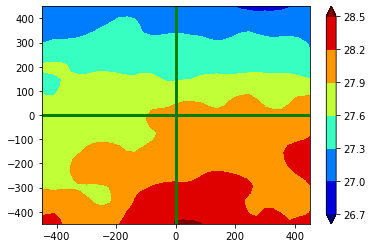

In [8]:
#plt.figure(figsize = (10, 10))
plt.contourf(rad_lons1, rad_lats1, skt1, cmap = "jet", extend = "both")
ax = plt.gca()
ax.axvline(x=0, color = "g", linestyle = "-", linewidth = 3)
ax.axhline(y=0, color = "g", linestyle = "-", linewidth = 3)
cbar = plt.colorbar(extend = "both")
plt.xlim(-450, 450)
plt.ylim(-450, 450)

<ipython-input-9-5a1b52e3fed1>:6: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(extend = "both")


(-450.0, 450.0)

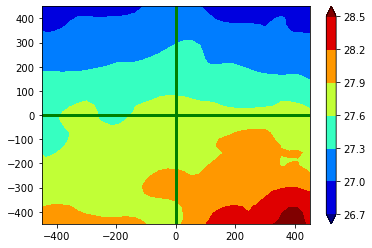

In [9]:
#plt.figure(figsize = (10, 10))
plt.contourf(rad_lons1, rad_lats1, skt2, cmap = "jet", extend = "both")
ax = plt.gca()
ax.axvline(x=0, color = "g", linestyle = "-", linewidth = 3)
ax.axhline(y=0, color = "g", linestyle = "-", linewidth = 3)
cbar = plt.colorbar(extend = "both")
plt.xlim(-450, 450)
plt.ylim(-450, 450)

<ipython-input-10-8ab0aba197cd>:6: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(extend = "both")


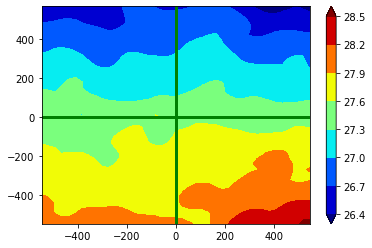

In [10]:
#plt.figure(figsize = (10, 10))
plt.contourf(rad_lons1, rad_lats1, skt3, cmap = "jet", extend = "both")
ax = plt.gca()
ax.axvline(x=0, color = "g", linestyle = "-", linewidth = 3)
ax.axhline(y=0, color = "g", linestyle = "-", linewidth = 3)
cbar = plt.colorbar(extend = "both")
#plt.xlim(-450, 450)
#plt.ylim(-450, 450)

<ipython-input-11-c165f8bb139e>:6: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(extend = "both")


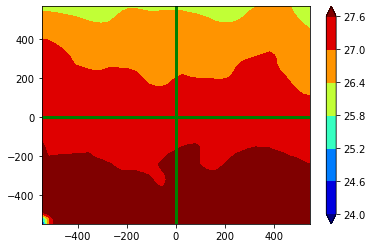

In [11]:
#plt.figure(figsize = (10, 10))
plt.contourf(rad_lons1, rad_lats1, skt4, cmap = "jet", extend = "both")
ax = plt.gca()
ax.axvline(x=0, color = "g", linestyle = "-", linewidth = 3)
ax.axhline(y=0, color = "g", linestyle = "-", linewidth = 3)
cbar = plt.colorbar(extend = "both")
#plt.xlim(-450, 450)
#plt.ylim(-450, 450)

<ipython-input-12-acead267049a>:6: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(extend = "both")


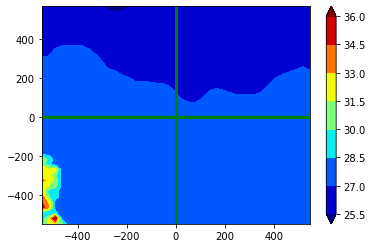

In [12]:
#plt.figure(figsize = (10, 10))
plt.contourf(rad_lons1, rad_lats1, skt5, cmap = "jet", extend = "both")
ax = plt.gca()
ax.axvline(x=0, color = "g", linestyle = "-", linewidth = 3)
ax.axhline(y=0, color = "g", linestyle = "-", linewidth = 3)
cbar = plt.colorbar(extend = "both")
#plt.xlim(-450, 450)
#plt.ylim(-450, 450)

<ipython-input-13-acac1bcf2313>:6: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(extend = "both")


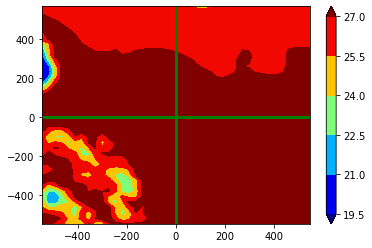

In [13]:
#plt.figure(figsize = (10, 10))
plt.contourf(rad_lons1, rad_lats1, skt6, cmap = "jet", extend = "both")
ax = plt.gca()
ax.axvline(x=0, color = "g", linestyle = "-", linewidth = 3)
ax.axhline(y=0, color = "g", linestyle = "-", linewidth = 3)
cbar = plt.colorbar(extend = "both")
#plt.xlim(-450, 450)
#plt.ylim(-450, 450)

In [14]:
zeros = np.zeros(41)

#[X,Y] = np.meshgrid(zeros,rad_lat1)
[X,Y] = np.meshgrid(rad_lon1,rad_lat1)
R = np.sqrt(np.square(X) + np.square(Y))

rad = np.arange(0, np.max(R),50)

In [15]:
skt_prof1 = np.zeros(len(rad))
skt_prof2 = np.zeros(len(rad))
skt_prof3 = np.zeros(len(rad))
skt_prof4 = np.zeros(len(rad))
skt_prof5 = np.zeros(len(rad))
skt_prof6 = np.zeros(len(rad))

index1 = 0
index2 = 0
index3 = 0 
index4 = 0 
index5 = 0 
index6 = 0 

In [16]:
bin_size = 50

In [17]:
for i in rad:
    mask = (np.greater(R, i-bin_size) & np.less(R, i+bin_size))
    values = skt1[mask]
    skt_prof1[index1] = np.mean(values)
    index1 += 1
    
for i in rad:
    mask = (np.greater(R, i-bin_size) & np.less(R, i+bin_size))
    values = skt2[mask]
    skt_prof2[index2] = np.mean(values)
    index2 += 1
    
for i in rad:
    mask = (np.greater(R, i-bin_size) & np.less(R, i+bin_size))
    values = skt3[mask]
    skt_prof3[index3] = np.mean(values)
    index3 += 1
    
for i in rad:
    mask = (np.greater(R, i-bin_size) & np.less(R, i+bin_size))
    values = skt4[mask]
    skt_prof4[index4] = np.mean(values)
    index4 += 1
    
for i in rad:
    mask = (np.greater(R, i-bin_size) & np.less(R, i+bin_size))
    values = skt5[mask]
    skt_prof5[index5] = np.mean(values)
    index5 += 1
    
for i in rad:
    mask = (np.greater(R, i-bin_size) & np.less(R, i+bin_size))
    values = skt6[mask]
    skt_prof6[index6] = np.mean(values)
    index6 += 1

<ipython-input-18-0a6cd5b04687>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


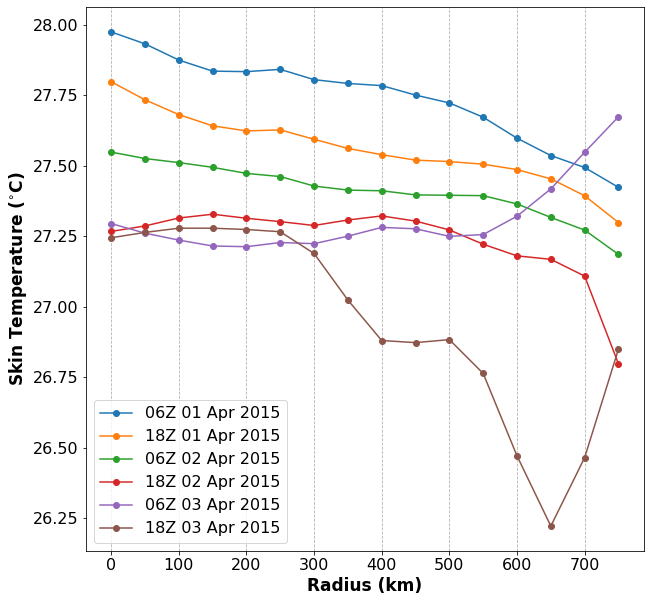

In [18]:
plt.figure(figsize = (10, 10))
plt.plot(rad, skt_prof1, "o-",label = "06Z 01 Apr 2015")
plt.plot(rad, skt_prof2, "o-",label = "18Z 01 Apr 2015")
plt.plot(rad, skt_prof3, "o-",label = "06Z 02 Apr 2015")
plt.plot(rad, skt_prof4, "o-",label = "18Z 02 Apr 2015")
plt.plot(rad, skt_prof5, "o-",label = "06Z 03 Apr 2015")
plt.plot(rad, skt_prof6, "o-",label = "18Z 03 Apr 2015")
#plt.xlim(0,300)
#plt.ylim(27,28)
plt.xlabel("Radius (km)", fontsize = 17, fontweight = "bold")
plt.ylabel("Skin Temperature ($^{\circ}$C)", fontsize = 17, fontweight ="bold")
plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax = plt.axes() 
ax.xaxis.grid(linestyle="--")
#plt.grid()

<ipython-input-20-714304f37196>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


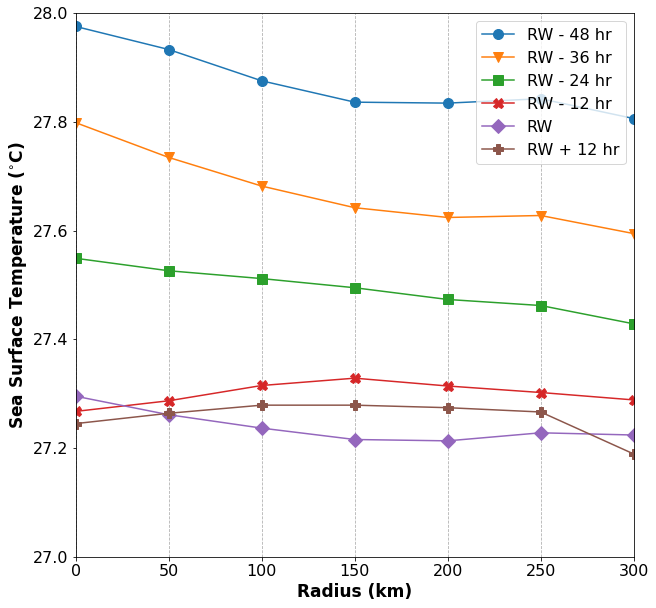

In [20]:
plt.figure(figsize = (10, 10))
plt.plot(rad, skt_prof1, "o-",label = "RW - 48 hr", markersize = 10)
plt.plot(rad, skt_prof2, "v-",label = "RW - 36 hr", markersize = 10)
plt.plot(rad, skt_prof3, "s-",label = "RW - 24 hr", markersize = 10)
plt.plot(rad, skt_prof4, "X-",label = "RW - 12 hr", markersize = 10)
plt.plot(rad, skt_prof5, "D-",label = "RW", markersize = 10)
plt.plot(rad, skt_prof6, "P-",label = "RW + 12 hr", markersize = 10)
plt.xlim(0,300)
plt.ylim(27,28)
plt.xlabel("Radius (km)", fontsize = 17, fontweight = "bold")
plt.ylabel("Sea Surface Temperature ($^{\circ}$C)", fontsize = 17, fontweight ="bold")
plt.legend(fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax = plt.axes() 
ax.xaxis.grid(linestyle="--")
#plt.grid()

In [21]:
skt_prof3

array([27.54913104, 27.52619913, 27.51182311, 27.49495701, 27.47337404,
       27.46226659, 27.42856832, 27.41418992, 27.4117472 , 27.39727399,
       27.39585211, 27.39442529, 27.36514412, 27.31722356, 27.27230792,
       27.1860067 ])

In [22]:
skt_prof4

array([27.26749051, 27.28701933, 27.31512395, 27.32859801, 27.31420506,
       27.30223416, 27.28858469, 27.30806485, 27.32246683, 27.30423324,
       27.27281927, 27.2220856 , 27.18077633, 27.16852983, 27.10901682,
       26.79764497])

In [23]:
skt_prof3[0] - skt_prof4[0]

0.2816405246221194

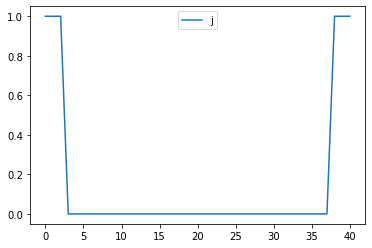

In [24]:
plt.plot(mask[2,:],label = "j")
plt.legend()